In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

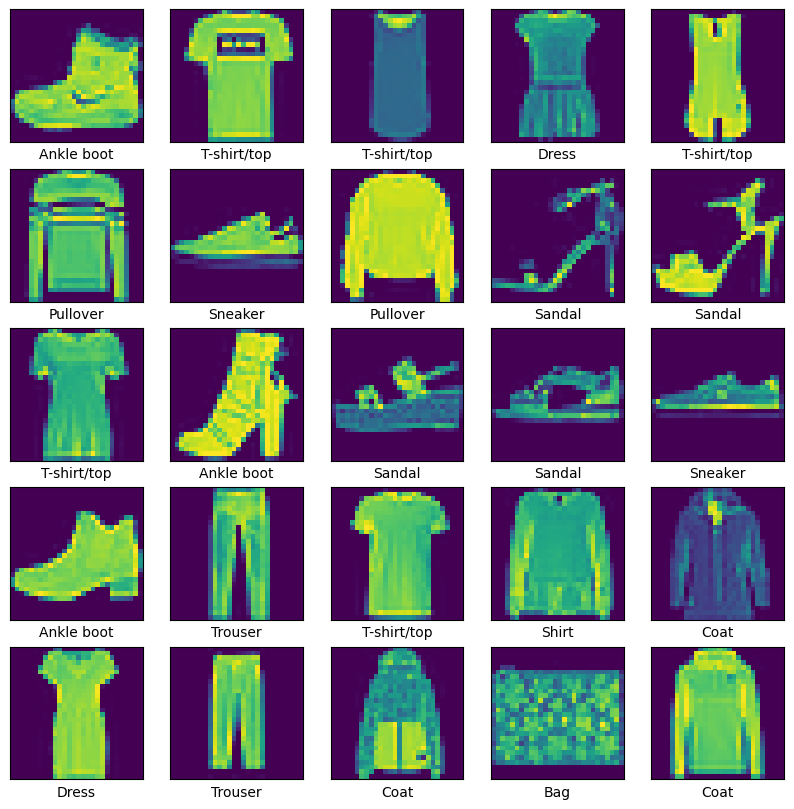

In [6]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten    
model = Sequential()     
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.fit(train_images.astype(np.float32), train_labels.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 0.5143 - accuracy: 0.8194 - val_loss: 0.4044 - val_accuracy: 0.8582
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3874 - accuracy: 0.8597 - val_loss: 0.3938 - val_accuracy: 0.8613
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3488 - accuracy: 0.8733 - val_loss: 0.3605 - val_accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3238 - accuracy: 0.8819 - val_loss: 0.3383 - val_accuracy: 0.8778
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3023 - accuracy: 0.8884 - val_loss: 0.3337 - val_accuracy: 0.8809


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\n Test accuracy = ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.8721

 Test accuracy =  0.8720999956130981


In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 4ms/step


In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

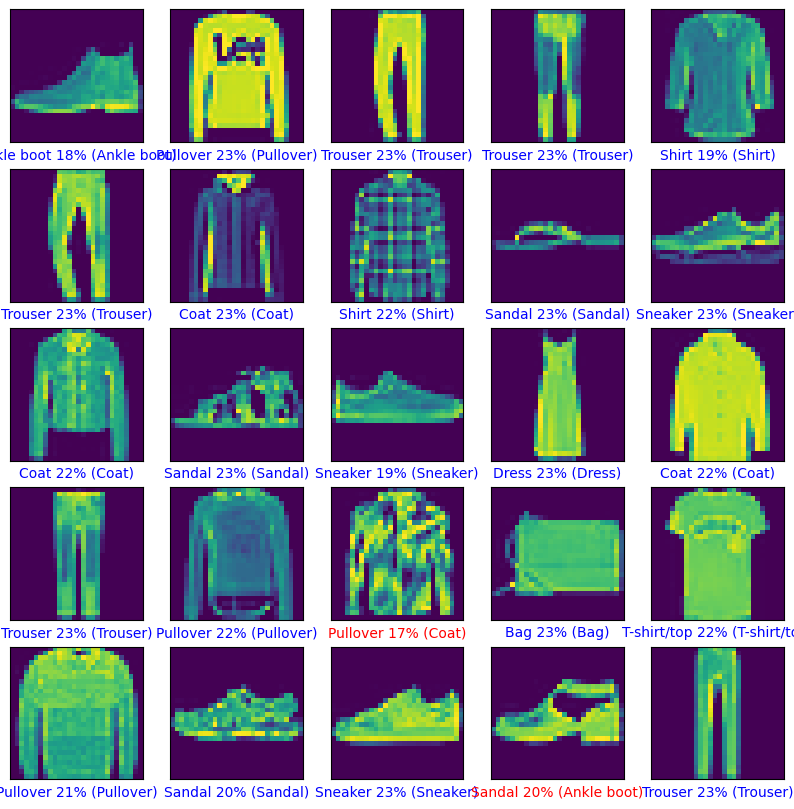

In [14]:
rows = 5
cols = 5
total_images = rows * cols
plt.figure(figsize = (10,10))
for i in range(total_images):
  plt.subplot(rows, cols, i + 1)
  plot_image(i, predictions[i], test_labels, test_images)

plt.show()

